# **Predicting Fuel Economy**

In [134]:
import pandas as pd
import seaborn as sns

In [135]:
mpg = pd.read_csv('../../Desktop/Maven/Python/Projects/mpg.csv')

In [136]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [137]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [138]:
mpg.origin = mpg.origin.astype('object')

In [139]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [140]:
mpg.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [141]:
mpg.horsepower = pd.to_numeric(mpg.horsepower, errors  = 'coerce')

In [142]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [143]:
mpg[mpg.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


## **Imputation with the real horsepower**

In [145]:
mpg.loc[32, 'horsepower'] = 75

In [146]:
mpg.loc[126, 'horsepower'] = 71

In [147]:
mpg.loc[330, 'horsepower'] = 53.5

In [148]:
mpg.loc[336, 'horsepower'] = 132

In [149]:
mpg.loc[354, 'horsepower'] = 81.5

In [150]:
mpg.loc[374, 'horsepower'] = 82

## **Summary Statistics**

In [152]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.138191,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.407431,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

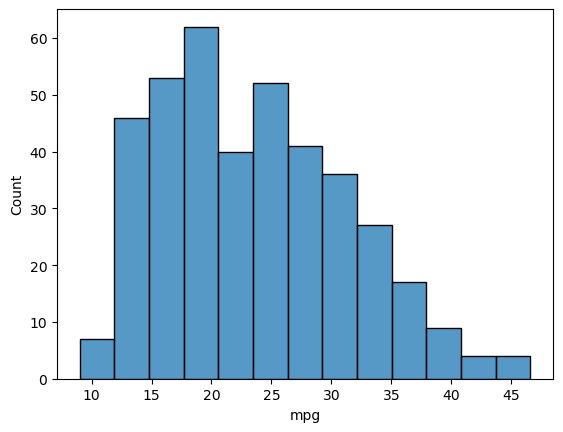

In [153]:
sns.histplot(x=mpg.mpg)

## Relationships

<Axes: >

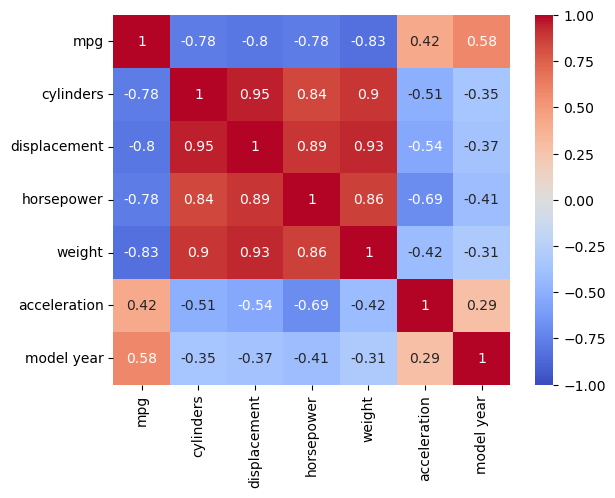

In [155]:
sns.heatmap(mpg.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

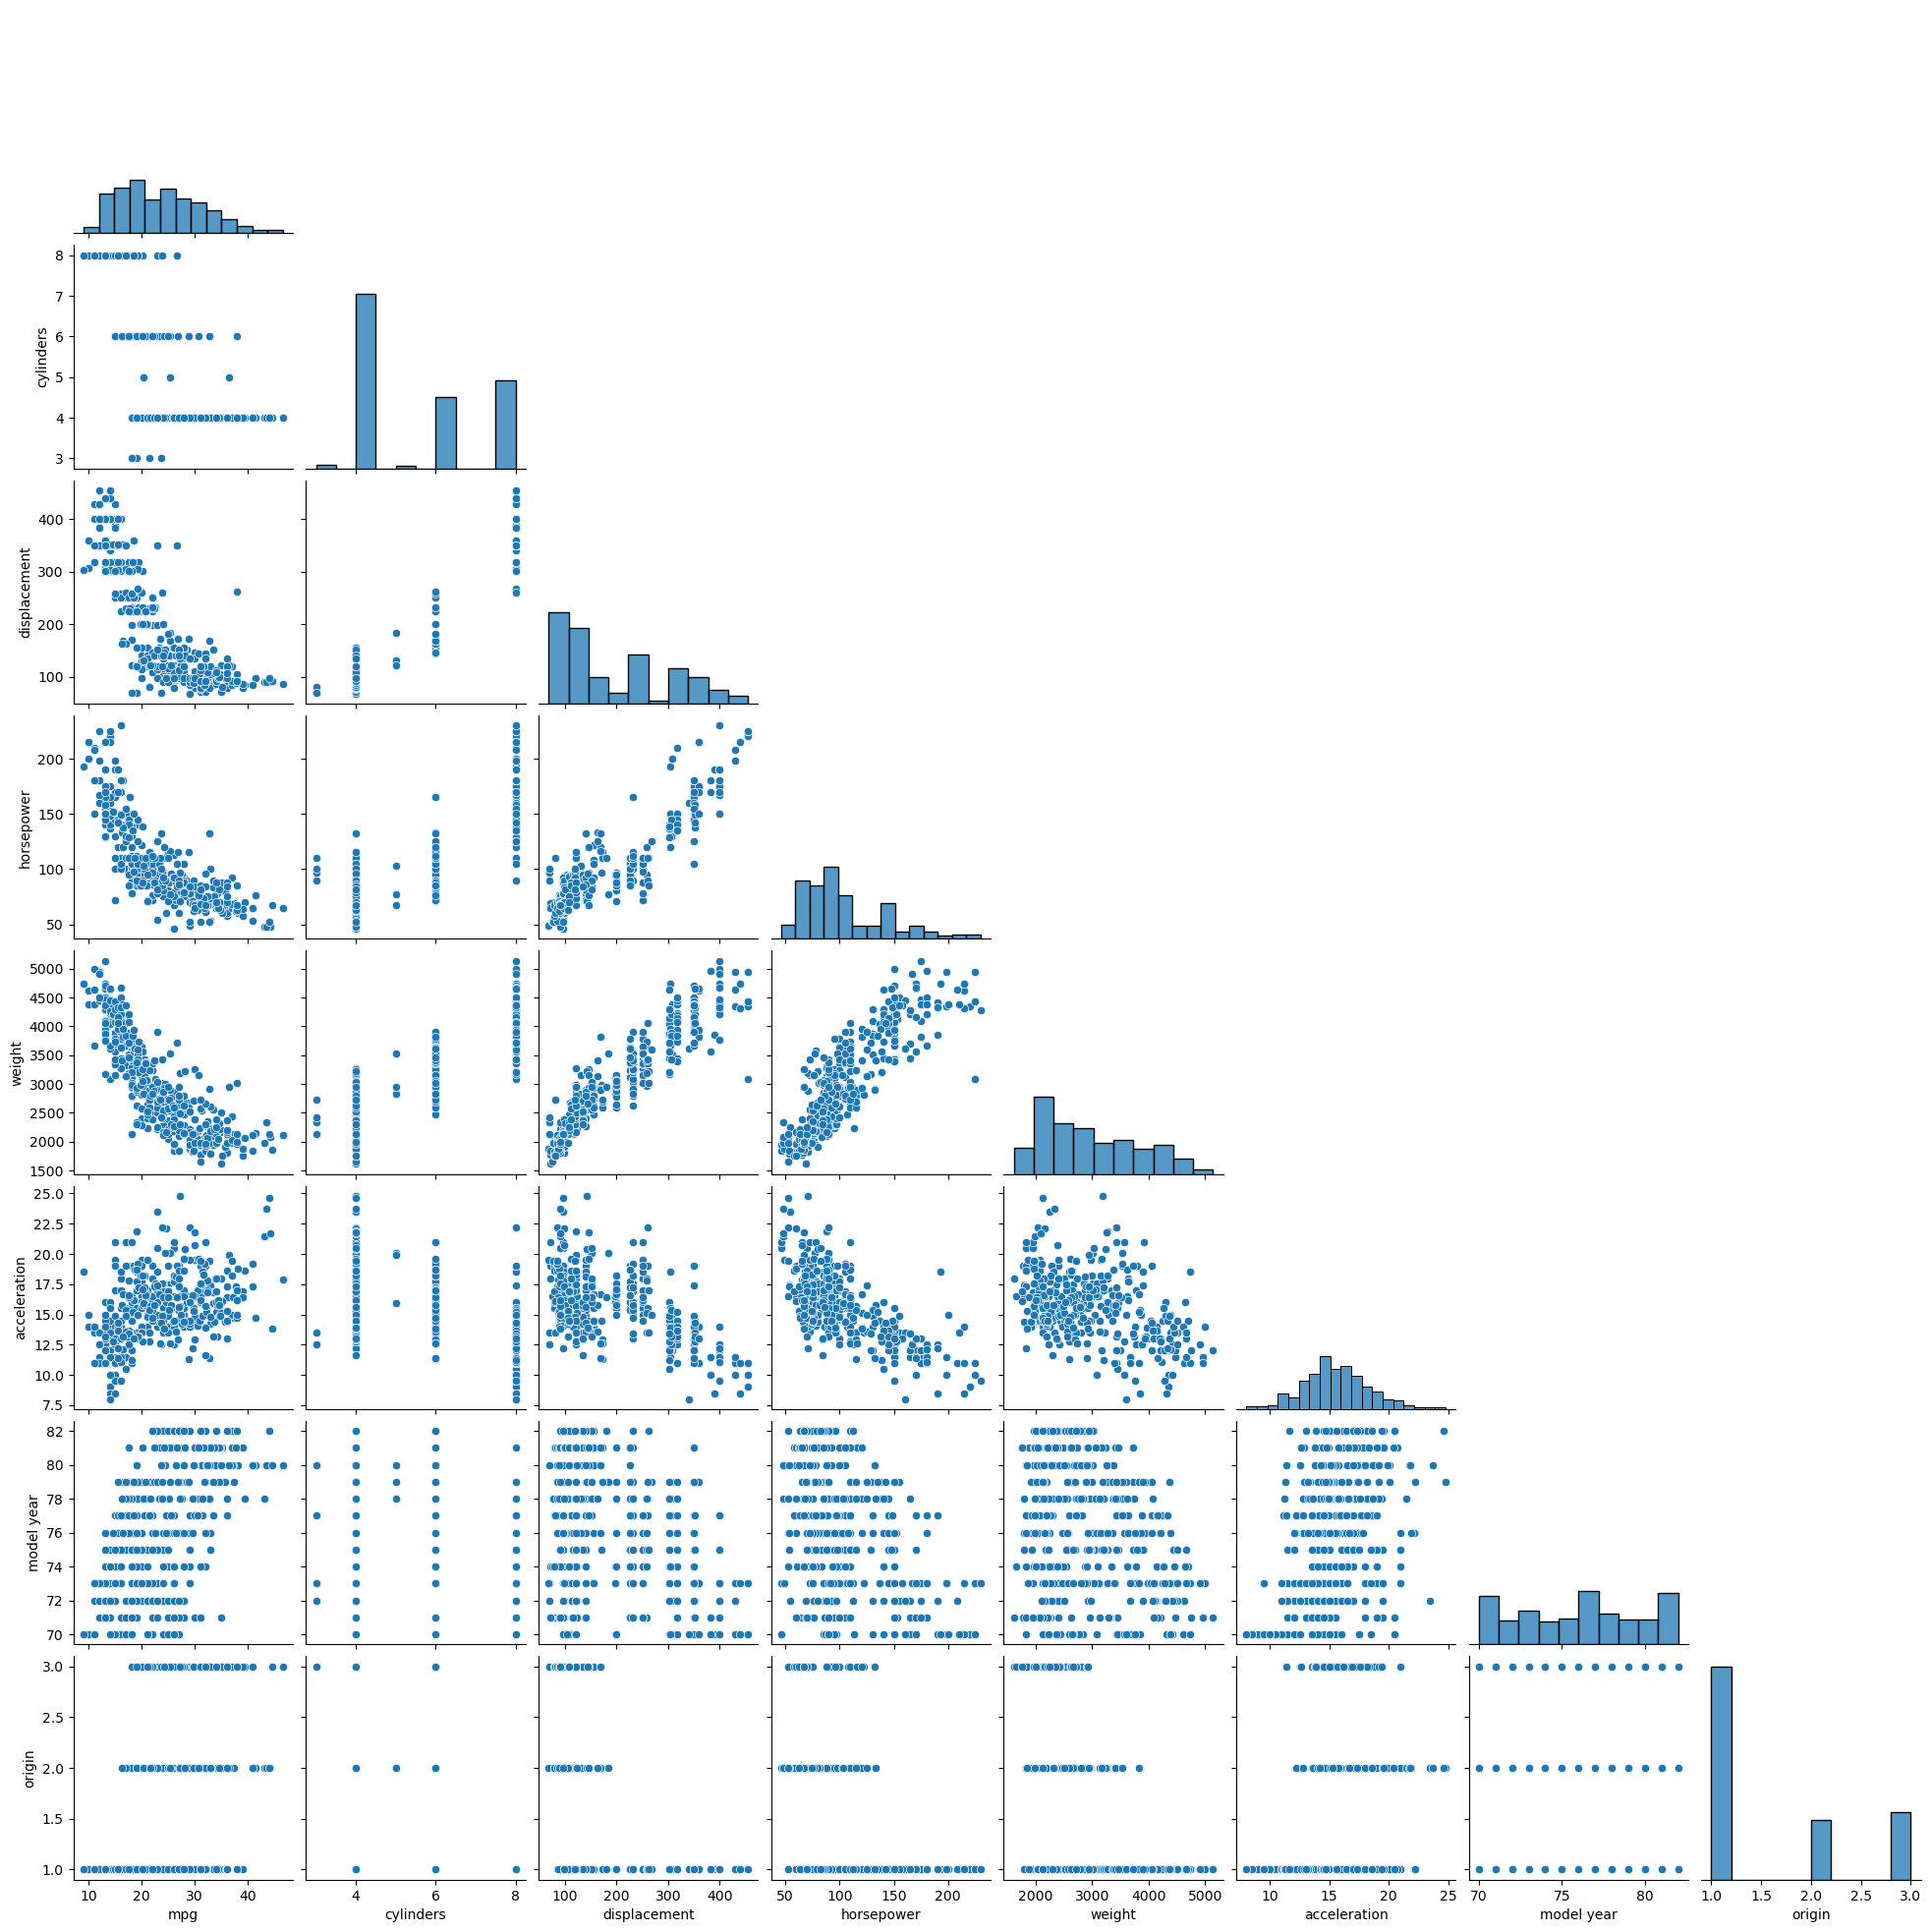

In [156]:
sns.pairplot(mpg, corner=True)

<Axes: xlabel='origin', ylabel='mpg'>

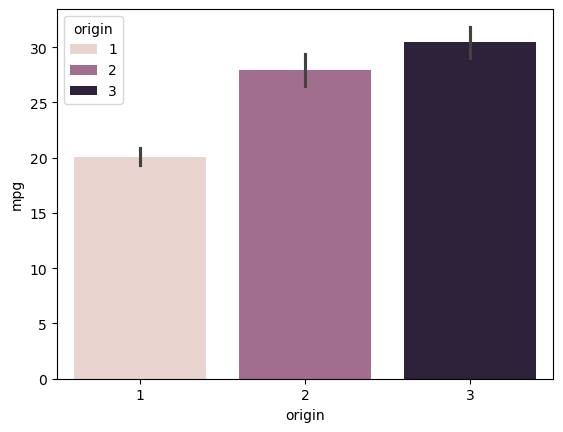

In [157]:
sns.barplot(data = mpg, x=mpg.origin, y=mpg.mpg, hue='origin')

## **Split the data and build the Multiple Regression Model**

In [159]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## **Model Preparation**

In [162]:
mpg_model = mpg.assign(
    weight2 = mpg.weight ** 2,
).drop('car name', axis = 1)

mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,weight2
0,18.0,8,307.0,130.0,3504,12.0,70,1,12278016
1,15.0,8,350.0,165.0,3693,11.5,70,1,13638249
2,18.0,8,318.0,150.0,3436,11.0,70,1,11806096
3,16.0,8,304.0,150.0,3433,12.0,70,1,11785489
4,17.0,8,302.0,140.0,3449,10.5,70,1,11895601


## Dummie Variables

In [163]:
mpg_model = pd.get_dummies(mpg_model, drop_first = True, dtype = 'int')
mpg_model.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0


In [164]:
# Easy way to avoid typing the feature list
mpg_model.columns.to_list()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'weight2',
 'origin_2',
 'origin_3']

In [165]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import numpy as np

In [166]:
features = [
   'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'weight2',
 'origin_2',
 'origin_3'
]

X = sm.add_constant(mpg_model[features])
y = mpg_model.mpg

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)    

## **Cross Validation**

In [168]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.888, 0.846, 0.839, 0.845, 0.839]
Cross Val R2s: 0.851 +- 0.018
All Validation MAEs:  [1.807, 2.388, 2.395, 2.176, 2.39]
Cross Val MAEs: 2.231 +- 0.228


## **Model Assumptions**

In [170]:
def residual_analysis_plot(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all', figsize = (10, 5))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('Predictions')
    ax[0].set_ylabel('Residuals')

    stats.probplot(residuals, dist='norm', plot=plt)
    ax[1].set_title('Normal Q-Q Plot')
    

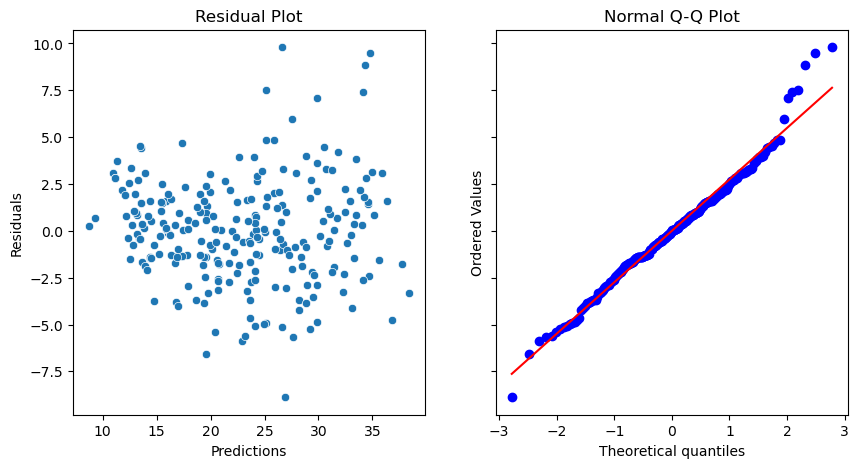

In [171]:
residual_analysis_plot(model)

In [172]:
# 4 folds summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     176.7
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          8.23e-102
Time:                        21:44:20   Log-Likelihood:                -619.51
No. Observations:                 255   AIC:                             1259.
Df Residuals:                     245   BIC:                             1294.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6146      5.541      0.111      0.912     -10.299      11.529
cylinders       -0.3230      0.332     -0.973      0.331      -0.977       0.331
displacement     0.0156      0.008      1.869      0.063      -0.001       0.032
horsepower      -0.0262      0.015     -1.776      0.077      -0.055       0.003
weight          -0.0205      0.002    -10.955      0.000      -0.024      -0.017
acceleration    -0.0772      0.106     -0.729      0.467      -0.286       0.131
model year       0.8495      0.054     15.673      0.000       0.743       0.956
weight2       2.242e-06   2.82e-07      7.958      0.000    1.69e-06     2.8e-06
origin_2         2.1473      0.608      3.534      0.000       0.951       3.344
origin_3         1.0520      0.633      1.662      0.098      -0.195       2.299
==============================================================================
Omnibus:                       12.979   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.003
Skew:                           0.325   Prob(JB):                     4.53e-05
Kurtosis:                       4.208   Cond. No.                     3.61e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
# All folds summary
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     222.2
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          5.06e-129
Time:                        21:44:20   Log-Likelihood:                -790.58
No. Observations:                 318   AIC:                             1601.
Df Residuals:                     308   BIC:                             1639.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4056      5.151     -0.273      0.785     -11.542       8.731
cylinders       -0.2328      0.321     -0.725      0.469      -0.865       0.399
displacement     0.0167      0.008      2.130      0.034       0.001       0.032
horsepower      -0.0205      0.014     -1.512      0.132      -0.047       0.006
weight          -0.0215      0.002    -12.290      0.000      -0.025      -0.018
acceleration     0.0198      0.097      0.205      0.837      -0.170       0.210
model year       0.8667      0.051     16.931      0.000       0.766       0.967
weight2       2.337e-06   2.65e-07      8.810      0.000    1.81e-06    2.86e-06
origin_2         2.3381      0.567      4.126      0.000       1.223       3.453
origin_3         1.5223      0.579      2.628      0.009       0.383       2.662
==============================================================================
Omnibus:                       30.717   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.060
Skew:                           0.548   Prob(JB):                     2.47e-13
Kurtosis:                       4.784   Cond. No.                     3.44e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Evaluate model test performance and interpret the model**

In [175]:
r2(y_val, model.predict(X_val))

0.8515303208801167

In [176]:
mae(y_val, model.predict(X_val))

2.3289354706954764

# **Ridge Regression**

In [178]:
# Standardization
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_m = std.fit_transform(X.values)
X_te = std.fit_transform(X_test.values)

In [179]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error as mae

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_m, y)
print(ridge_model.score(X_m, y))
print(mae(y, ridge_model.predict(X_m)))
print(ridge_model.alpha_)

0.866525236827791
2.1651483233849
0.026126752255633278


## **Ridge Model Evaluation**

In [181]:
r2(y_test, ridge_model.predict(X_te))

0.8212230598932363

In [182]:
mae(y_test, ridge_model.predict(X_te))

2.289274469785238